In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("glycemie_clean.csv",sep=',')


# Renommage des colonnes
df.columns = ["date", "time", "patient_id", "glucose", "source", "datetime"]

# Convertir datetime
df["datetime"] = pd.to_datetime(df["datetime"])

# Trier par patient puis par temps
df = df.sort_values(["patient_id", "datetime"])

In [3]:
#On convertion de la colonne glucose comme numerique
df["glucose"] = pd.to_numeric(df["glucose"], errors="coerce")

df["glucose"].describe()

count    29244.000000
mean        79.416718
std         93.522136
min          0.000000
25%          6.000000
50%         24.000000
75%        142.000000
max        501.000000
Name: glucose, dtype: float64

<Axes: xlabel='glucose', ylabel='Count'>

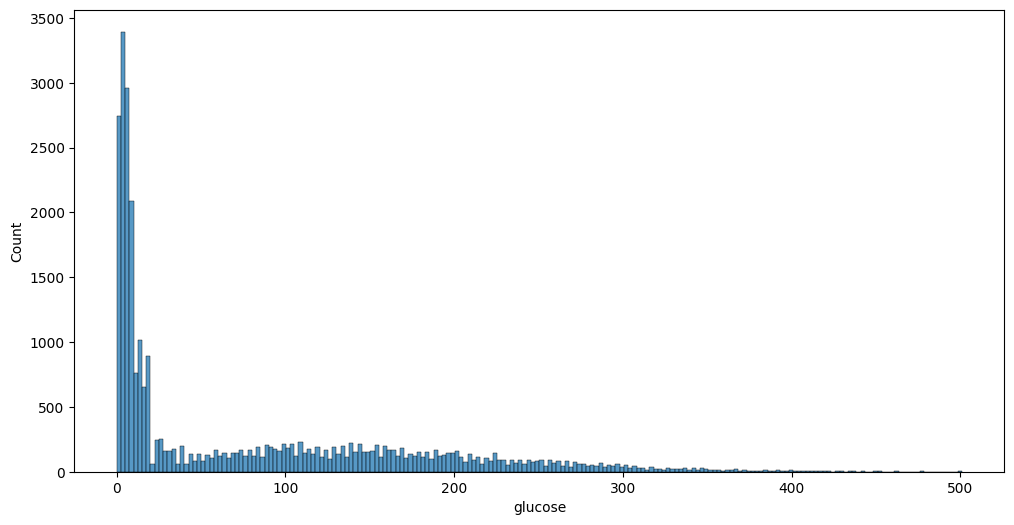

In [7]:

#Visualisation de la distribution
import seaborn as sns 
plt.figure(figsize=(12,6))
df["glucose"] = pd.to_numeric(df["glucose"], errors="coerce")
sns.histplot(df["glucose"], bins=200)

# On remarque un pic entre 0 à environ 20 mg/dL

In [8]:
# Identifier les valeurs parasites
df["glucose"].value_counts().head(20)

glucose
6.0     2043
0.0     1265
3.0     1194
4.0     1173
2.0     1049
5.0      997
7.0      893
10.0     822
8.0      727
12.0     615
18.0     569
9.0      540
1.0      421
16.0     420
15.0     399
14.0     390
20.0     260
17.0     235
13.0     227
27.0     210
Name: count, dtype: int64

In [9]:
# Définir un seuil minimal physiologique (glycemie< 40 mg/dL)

df_clean = df[df["glucose"] >= 40]

df_clean["glucose"].describe()

# La médiane (149 mg/dL) est élevée

# Une glycémie normale à jeun est autour de 70–100 mg/dL.

# Une médiane à 149 mg/dL prouve que nous sommes face à une population :

# une population majoritairement hyperglycémique, typique de patients en réanimation, ou de patients diabétiques non contrôlés.



count    13559.000000
mean       161.079209
std         79.754444
min         40.000000
25%         99.000000
50%        149.000000
75%        210.000000
max        501.000000
Name: glucose, dtype: float64

In [10]:
# valeurs par patients:

df.groupby("patient_id")["glucose"].describe()

,count,mean,std,min,25%,50%,75%,max
patient_id,,,,,,,,
4,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
33,9480.0,6.614662,5.417712,0.0,4.00,6.0,9.00,344.0
34,3828.0,15.384927,14.152530,1.0,7.00,15.0,20.00,388.0
35,1053.0,15.858500,7.808906,3.0,10.00,15.0,21.00,30.0
36,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
48,1881.0,171.123339,78.570349,28.0,113.00,160.0,209.00,487.0
56,119.0,150.815126,82.788271,31.0,110.00,130.0,160.00,501.0
57,989.0,160.286148,98.904843,19.0,75.00,142.0,227.00,501.0
58,3516.0,170.682878,77.750386,23.0,107.75,161.0,223.00,461.0


In [11]:
 # Il faut filter les patients valides 48, 56, 57, 58, 59, 60, 61, 62, 63,64 car les valeurs de la glycémie est réelle dans ces cas"
# Les autres cas correspondent à des codes techniques envoyés par un capteur ou un appareil (car valeurs trop basses). 

statistiques = df.groupby("patient_id")["glucose"].median() 
patients_valides = statistiques[statistiques > 40].index 
df_clean = df[df["patient_id"].isin(patients_valides)]
print(df_clean.head(20))
df_clean.describe()

             date   time  patient_id  glucose   source            datetime
28278  05-26-1988  22:00          48    120.0  data-68 1988-05-26 22:00:00
28283  05-27-1988  22:00          48    167.0  data-68 1988-05-27 22:00:00
28288  05-28-1988  22:00          48    117.0  data-68 1988-05-28 22:00:00
28292  05-29-1988  22:00          48    120.0  data-68 1988-05-29 22:00:00
28297  05-30-1988  22:00          48    163.0  data-68 1988-05-30 22:00:00
8669   07-13-1988  22:00          48    196.0  data-26 1988-07-13 22:00:00
8674   07-14-1988  22:00          48    251.0  data-26 1988-07-14 22:00:00
8679   07-15-1988  22:00          48    201.0  data-26 1988-07-15 22:00:00
8684   07-16-1988  22:00          48     97.0  data-26 1988-07-16 22:00:00
8689   07-17-1988  22:00          48    235.0  data-26 1988-07-17 22:00:00
8694   07-18-1988  22:00          48    160.0  data-26 1988-07-18 22:00:00
8699   07-19-1988  22:00          48     78.0  data-26 1988-07-19 22:00:00
8704   07-20-1988  22:00 

,patient_id,glucose,datetime
count,13645.000000,13637.000000,13645
mean,58.355515,160.164112,1990-07-26 11:28:34.456577536
min,48.000000,0.000000,1988-03-27 08:00:00
25%,58.000000,98.000000,1989-11-25 07:00:00
50%,60.000000,149.000000,1990-09-10 21:32:00
75%,62.000000,209.000000,1991-04-29 06:56:00
max,64.000000,501.000000,1991-09-23 21:10:00
std,4.596616,80.194240,NaN


In [12]:
# Nettoyage final 

df_clean = df_clean[df_clean["glucose"] >= 40]
df_clean["glucose"].describe()

count    13428.000000
mean       162.121016
std         79.252659
min         40.000000
25%        100.000000
50%        151.000000
75%        210.000000
max        501.000000
Name: glucose, dtype: float64

In [13]:

print(df_clean.groupby("patient_id")["glucose"].describe())
print(df_clean)
df_clean.to_csv("df_clean.csv", index=False)

             count        mean         std   min     25%    50%     75%    max
patient_id                                                                    
48          1866.0  172.219721   77.923520  40.0  114.00  160.0  210.00  487.0
56           117.0  152.811966   82.052541  49.0  111.00  130.0  160.00  501.0
57           940.0  166.825532   97.095023  40.0   85.00  147.0  235.25  501.0
58          3489.0  171.740613   77.110207  40.0  109.00  162.0  223.00  461.0
59            20.0  178.350000   81.883277  49.0   87.00  190.5  230.00  339.0
60          2723.0  145.327947   73.845601  40.0   88.00  135.0  187.00  452.0
61            65.0  247.892308  101.477387  69.0  177.00  226.0  306.00  476.0
62          3105.0  158.357810   73.062838  40.0  101.00  148.0  203.00  450.0
63           215.0  188.925581   90.710096  42.0  108.00  190.0  257.00  413.0
64           888.0  150.870495   86.067487  41.0   81.75  130.0  206.00  461.0
             date   time  patient_id  glucose   sour

In [14]:
# Verification du dataset enregistré

pd.read_csv('df_clean.csv').head()

,date,time,patient_id,glucose,source,datetime
0,05-26-1988,22:00,48,120.0,data-68,1988-05-26 22:00:00
1,05-27-1988,22:00,48,167.0,data-68,1988-05-27 22:00:00
2,05-28-1988,22:00,48,117.0,data-68,1988-05-28 22:00:00
3,05-29-1988,22:00,48,120.0,data-68,1988-05-29 22:00:00
4,05-30-1988,22:00,48,163.0,data-68,1988-05-30 22:00:00


In [ ]:
# Informations dataset
print(df_clean.info())
# Statistiques du dataset
print(df_clean.describe())
# Valeurs uniques de la colonne "patient_id"
print(df_clean["patient_id"].unique())

# Dataset pret pour l'analyse car valeurs de la glycémie cohérente, valeur des patients sans doublons, type des colonnes cohérentes

<class 'pandas.core.frame.DataFrame'>
Index: 13428 entries, 28278 to 25746
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        13428 non-null  object        
 1   time        13428 non-null  object        
 2   patient_id  13428 non-null  int64         
 3   glucose     13428 non-null  float64       
 4   source      13428 non-null  object        
 5   datetime    13428 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 734.3+ KB
None
         patient_id       glucose                       datetime
count  13428.000000  13428.000000                          13428
mean      58.346291    162.121016  1990-07-25 12:14:28.650580992
min       48.000000     40.000000            1988-03-27 08:00:00
25%       58.000000    100.000000            1989-11-23 17:03:45
50%       60.000000    151.000000            1990-09-10 17:34:00
75%       62.000000    210.0000

In [18]:
patient_stats = df_clean.groupby("patient_id")["glucose"].describe().round(2)
print(patient_stats)

             count    mean     std   min     25%    50%     75%    max
patient_id                                                            
48          1866.0  172.22   77.92  40.0  114.00  160.0  210.00  487.0
56           117.0  152.81   82.05  49.0  111.00  130.0  160.00  501.0
57           940.0  166.83   97.10  40.0   85.00  147.0  235.25  501.0
58          3489.0  171.74   77.11  40.0  109.00  162.0  223.00  461.0
59            20.0  178.35   81.88  49.0   87.00  190.5  230.00  339.0
60          2723.0  145.33   73.85  40.0   88.00  135.0  187.00  452.0
61            65.0  247.89  101.48  69.0  177.00  226.0  306.00  476.0
62          3105.0  158.36   73.06  40.0  101.00  148.0  203.00  450.0
63           215.0  188.93   90.71  42.0  108.00  190.0  257.00  413.0
64           888.0  150.87   86.07  41.0   81.75  130.0  206.00  461.0


In [ ]:
# Un patient est considéré comme diabétique si au moins un des critères suivants est vrai :

# max glucose > 200 mg/dL

# médiane > 140 mg/dL

# plus de 30 % des valeurs > 180 mg/dL

# Ces seuils sont cohérents avec les critères diagnostiques du diabète et les recommandations "ICU".

In [24]:
#  Statistiques de base
stats = df_clean.groupby("patient_id")["glucose"].agg(["median", "max", "count"])

# Pourcentage d'hyperglycémies > 180 mg/dL
high_counts = df_clean[df_clean["glucose"] > 180].groupby("patient_id")["glucose"].count()
stats["pct_high"] = high_counts / stats["count"]

# Création du label diabetic
stats["diabetic"] = (
    (stats["max"] > 200) |
    (stats["median"] > 140) |
    (stats["pct_high"] > 0.30)
)

stats

,median,max,count,pct_high,diabetic
patient_id,,,,,
48,160.0,487.0,1866,0.394427,True
56,130.0,501.0,117,0.179487,True
57,147.0,501.0,940,0.401064,True
58,162.0,461.0,3489,0.421897,True
59,190.5,339.0,20,0.550000,True
60,135.0,452.0,2723,0.279471,True
61,226.0,476.0,65,0.723077,True
62,148.0,450.0,3105,0.342029,True
63,190.0,413.0,215,0.511628,True


In [ ]:
# Features de base
features = df_clean.groupby("patient_id")["glucose"].agg(
    mean_glucose="mean",
    median_glucose="median",
    std_glucose="std",
    min_glucose="min",
    max_glucose="max"
)

# Pourcentage d'hyperglycémies
features["pct_high_180"] = (
    df_clean[df_clean["glucose"] > 180]
    .groupby("patient_id")["glucose"]
    .count() / df_clean.groupby("patient_id")["glucose"].count()
)

# Pourcentage d'hypoglycémies
features["pct_low_70"] = (
    df_clean[df_clean["glucose"] < 70]
    .groupby("patient_id")["glucose"]
    .count() / df_clean.groupby("patient_id")["glucose"].count()
)

# Ajout d'un critère sevère
features["severe"] = features["mean_glucose"] > 170

# Amplitude
features["amplitude"] = features["max_glucose"] - features["min_glucose"]

# Coefficient de variation
features["cv"] = features["std_glucose"] / features["mean_glucose"]

# Ajouter le label diabète
features = features.merge(stats["diabetic"], on="patient_id")

# Sauvegarde dans un fihcier csv

features.to_csv("features_patient_level.csv", index=True)

# Affichage
features



,mean_glucose,median_glucose,std_glucose,min_glucose,max_glucose,pct_high_180,pct_low_70,severe,amplitude,cv,diabetic
patient_id,,,,,,,,,,,
48,172.219721,160.0,77.923520,40.0,487.0,0.394427,0.053055,True,447.0,0.452466,True
56,152.811966,130.0,82.052541,49.0,501.0,0.179487,0.076923,False,452.0,0.536951,True
57,166.825532,147.0,97.095023,40.0,501.0,0.401064,0.186170,False,461.0,0.582015,True
58,171.740613,162.0,77.110207,40.0,461.0,0.421897,0.065921,True,421.0,0.448992,True
59,178.350000,190.5,81.883277,49.0,339.0,0.550000,0.100000,True,290.0,0.459116,True
60,145.327947,135.0,73.845601,40.0,452.0,0.279471,0.146897,False,412.0,0.508131,True
61,247.892308,226.0,101.477387,69.0,476.0,0.723077,0.015385,True,407.0,0.409361,True
62,158.357810,148.0,73.062838,40.0,450.0,0.342029,0.092110,False,410.0,0.461378,True
63,188.925581,190.0,90.710096,42.0,413.0,0.511628,0.093023,True,371.0,0.480137,True
